In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split

# model 

In [13]:
data=sns.load_dataset("iris")

In [14]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [16]:
x=data.loc[:,["sepal_length"]]
y=data.iloc[:,-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.20,random_state=2)

In [18]:
X_train

,sepal_length
126,6.2
23,5.1
64,5.6
117,7.7
84,5.4
...,...
75,6.6
43,5.0
22,4.6
72,6.3


# Model building 

In [19]:
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [20]:
pred=model.predict(X_test)
accuracy_score(y_test,pred)

0.8

In [23]:
accuracy_score(y_test,pred)

0.8

In [ ]:
classification_report(y_test,pred)

# optimal value of k

In [21]:
scores=[]

for i in range(1,40,2):
    model=LogisticRegression(C = i)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    scores.append(accuracy_score(y_test,pred))



Text(0, 0.5, 'Accuracy')

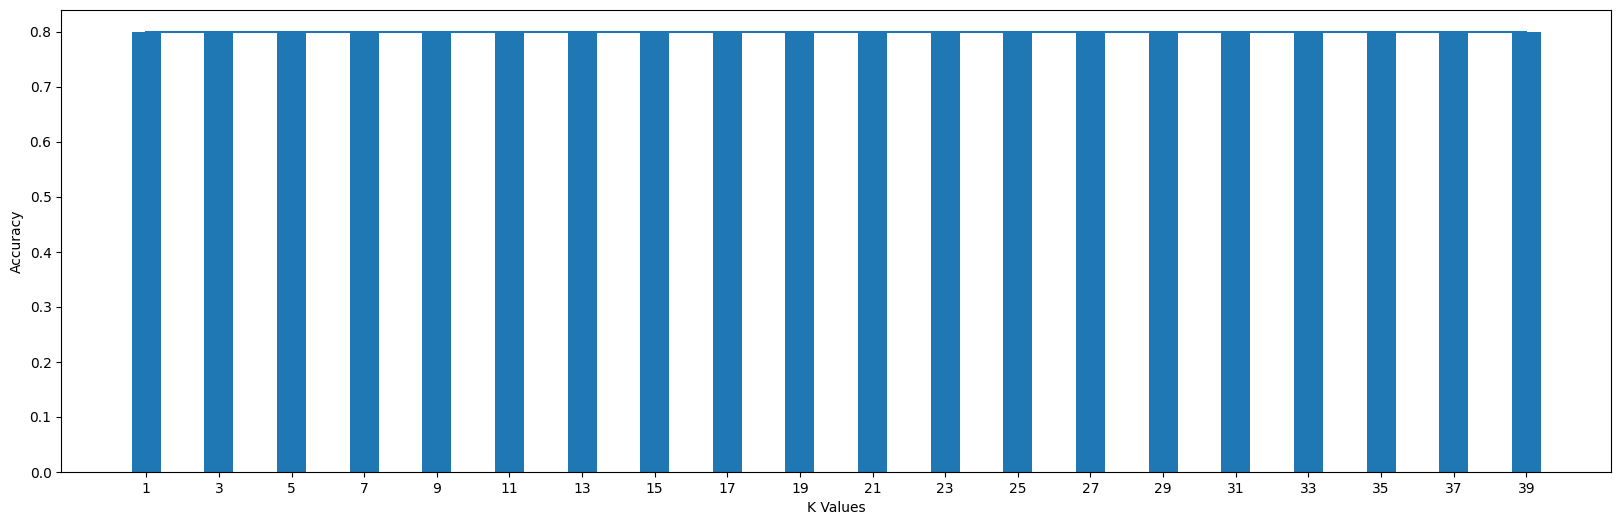

In [22]:
plt.figure(figsize=(20,6))
plt.bar(range(1,40,2),scores)
plt.plot(range(1,40,2),scores)
plt.xticks(range(1,40,2))
plt.xlabel("K Values")
plt.ylabel("Accuracy")


In [26]:
from sklearn.preprocessing import LabelEncoder
data['species'] = LabelEncoder().fit_transform(data['species'])


data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
x = data.iloc[:,:-1]
x
y = data.iloc[:,-1:]
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [51]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [52]:
# Model
model1 = LogisticRegression()
model1.fit(X_train,y_train)

c:\Users\Mohan Gola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [53]:
y_pred = model1.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

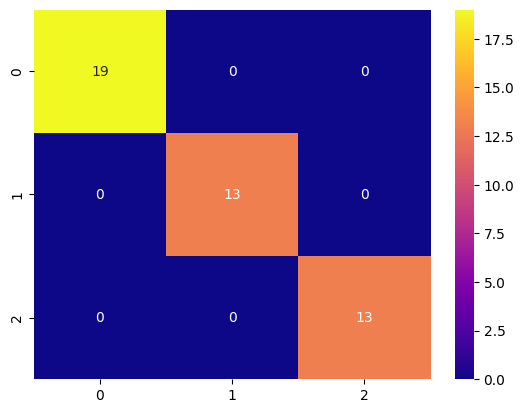

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [54]:
accuracy_score(y_test,y_pred)
from sklearn.metrics import confusion_matrix,classification_report

sns.heatmap(confusion_matrix(y_test,y_pred),cmap='plasma',annot=True)
plt.show()
print(classification_report(y_test,y_pred))